<p style='color:black; font-size:32px; text-align:center'> <strong>Brief projet : Et si la Poste se mettait à l'IA ? </strong>
</p>
<p style='color:grey; font-size:24px; text-align:center'>le 23/02/2022 </p>

                                                                                  Babacar et Aïssa

 <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Briefing**
 <p style="color:#4caba9;">La poste fait appel à vous pour dévelloper un programme d'intelligence artificielle qui lui permettrait de reconnaitre automatiquement les codes postaux écrits sur les enveloppes. Ceci lui permettrait d'accélerer sa chaine de distribution du courrier en fonction des départements.</p>

## Import des librairies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

 <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Etapes de construction d’un modèle**
 <p style="color:#4caba9;"> 
✔ Importer les données <br>
✔ Séparation des données en sous ensemble d’entraînement et un sous ensemble de test. <br>
✔ construction du modèle <br>
✔ Entrainement du modèle avec le sous ensemble d'entraînement<br>
✔ Prédictions <br>
✔ Evaluation du modèle <br>
</p>

# PARTIE 1 : Phase exploratoire : visualisation et analyse du jeu de donnée

In [2]:
# Import du fichier train
df = pd.read_csv("C:/Users/Utilisateur/Downloads/train.csv/train.csv")

In [3]:
# Import du fichier test
df_V = pd.read_csv("C:/Users/Utilisateur/Downloads/test.csv/test.csv")

> ### Que contient mon Dataset ? 

In [4]:
# Afficher les cinq premières lignes et les cinq dernières
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# On vérifie la taille de notre dataframe
df.shape

(42000, 785)

In [6]:
# Voici les valeurs nulles
df.isna().sum() # ou df.isna().any()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [7]:
# obsevation de la valeur unique pour y
order = list(np.sort(df['label'].unique()))
print(order)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


 <i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **Obervations**
> <p style="color:#4caba9;"> 
Dataset relativement grand, il comporte 420000 lignes et 785 colonnes. Nous confirmons que nous n'avons pas de valeurs nulles.
</p>

 > ### Propriétés statistiques de mes données

In [8]:
# La fonction .describe() nous donne une vision d'ensemble (statistiques) pour chaque colonne
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


> <p style="color:#4caba9;">✔ <b>count</b>: compte le nombre de valeurs non nulles dans le dataset. <br>
✔ <b>mean</b>: valeur moyenne. <br>
    ✔ <b>std</b>: <i>'standard deviation'</i>, écart type, indicateur statistique mesurant la dispersion des valeurs d'un échantillon autour de la moyenne.<br>
✔ <b>min</b>: valeur minimum.<br>
✔ <b>25% </b>: premier quartile 1/4( ou centile 25%) représente 25% des valeurs de l'échantillon. <br>
✔ <b>50% </b>: La médiane est la valeur centrale d'une série statistique dont les valeurs observées ont été ordonnées.<br>
✔ <b>75%  </b>: troisième quartile 3/4 (ou centile 75%) représente 75% des valeurs de l'échantillon.<br>
✔<b> max</b>: valeur maximum.
</p>


<i class="fa fa-arrow-circle-right" aria-hidden="true"></i> **observations**




>  <i class="fa fa-bar-chart fa-3x" aria-hidden="true"></i> 
> # Analyse & Visualisation

C:\Users\Utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

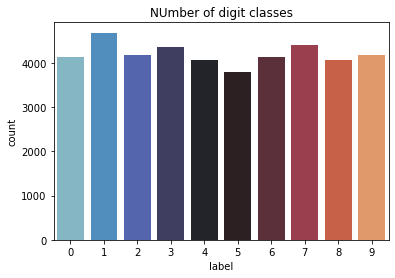

In [9]:
## Visualizing the number of class and counts in the datasets Visualisation du nombre de classe ainsi 
plt.plot(figure = (16,10))
g = sns.countplot( df["label"], palette = 'icefire')
plt.title('NUmber of digit classes')
df.label.astype('category').value_counts()

Text(0.5, 1.0, 'Digit 4')

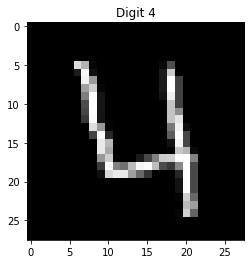

In [10]:
# Tracer certains échantillons ainsi que les convertir en matrice
quatre = df.iloc[3, 1:]
quatre.shape
quatre = quatre.values.reshape(28,28)
plt.imshow(quatre, cmap='gray')
plt.title("Digit 4")

Text(0.5, 1.0, 'Digit 7')

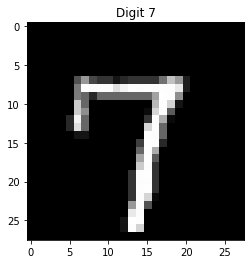

In [11]:
sept = df.iloc[6, 1:]
sept.shape
sept = sept.values.reshape(28, 28)
plt.imshow(sept, cmap='gray')
plt.title("Digit 7")

# PARTIE 2: préparation des données

In [12]:
# Préparation des données

# Effectuons quelques étapes de préparation des données avant la modélisation. 
#Tout d'abord, voyons s'il est important de redimensionner les fonctionnalités, car elles peuvent avoir des plages variables.

In [13]:
# valeurs moyennes des features
round(df.drop('label', axis=1).mean(), 2)

pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 784, dtype: float64

In [14]:
# Dans ce cas, les valeurs moyennes ne varient pas beaucoup (par exemple, avoir un diff d'un ordre de grandeur). Néanmoins, il est préférable de les redimensionner.

In [15]:
# Nous stockons le dataframe df en deux variables  X et y

y = df['label'] # target

## Suppression de la colonne 'label' du dataframe df
X = df.drop(columns = 'label') # features


## Impression de la taille des données
print(df.shape)

(42000, 785)


 > ### Normalisation de X

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
print(scaler.fit_transform(X))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# PARTIE 3: Construction du modèle 

In [19]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
# # Modèle linéaire

# model_linear = SVC(kernel='linear')
# model_linear.fit(X_train, y_train)

# # Prédiction
# y_pred = model_linear.predict(X_test)

##### Matrix de confusion et accuracy

In [21]:
# # accuracy
# print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# # Matrix de confusion
# print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

Modele non linéaire

In [22]:
# Modèle non-linéaire
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

##### Matrix de confusion et accuracy

In [23]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# Matrix de confusion
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9747619047619047 

[[801   0   1   0   1   3   3   0   4   0]
 [  0 953   3   2   0   0   0   1   2   0]
 [  2   1 843   2   1   0   0   5   6   0]
 [  1   1  11 821   0  12   2   4   9   2]
 [  1   3   2   0 800   1   4   2   0  14]
 [  2   0   0   4   0 743   6   0   1   0]
 [  2   0   0   0   2   5 831   0   1   0]
 [  0   2   6   1   6   2   0 873   3   6]
 [  2   3   0   3   3   5   4   0 747   1]
 [  5   2   2   4   9   1   0  11   2 776]]


#### Grid Search: Hyperparameter Tuning

In [24]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 0)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [5,10]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,8))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

In [ ]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

In [ ]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")